Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📊 RESULTS: FORM-FUNCTION CORRELATIONS

📝 [Generated Narrative 1]:
The cross-tabulation reveals a significant correlation (n=106) between the source domain **'HUMAN CONDITION'** and the pragmatic function of **'Clarification'**.
This suggests that when the Qur'an employs this specific imagery, the communicative intention is predominantly geared towards this function.


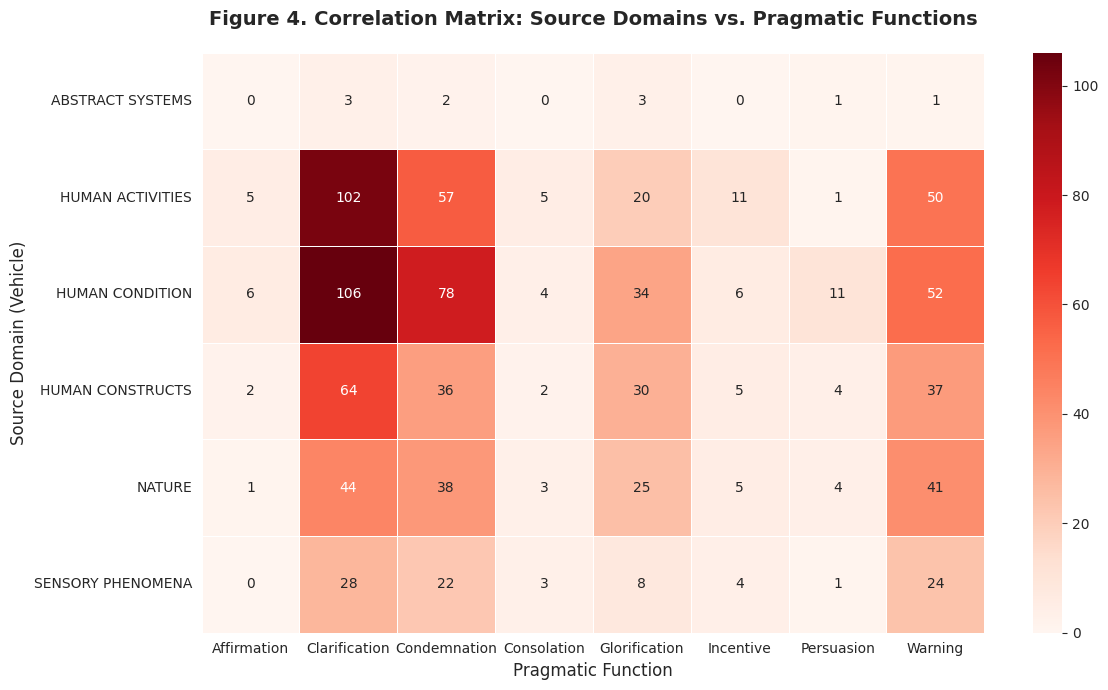



📝 [Generated Narrative 2]:
Syntactic analysis indicates a strong correlation (n=106) between **'Verbal (Dynamic)'** and the target domain of **'DEEDS'**.
This aligns with the hypothesis that Verbal structures are used to encode dynamic processes regarding this domain.


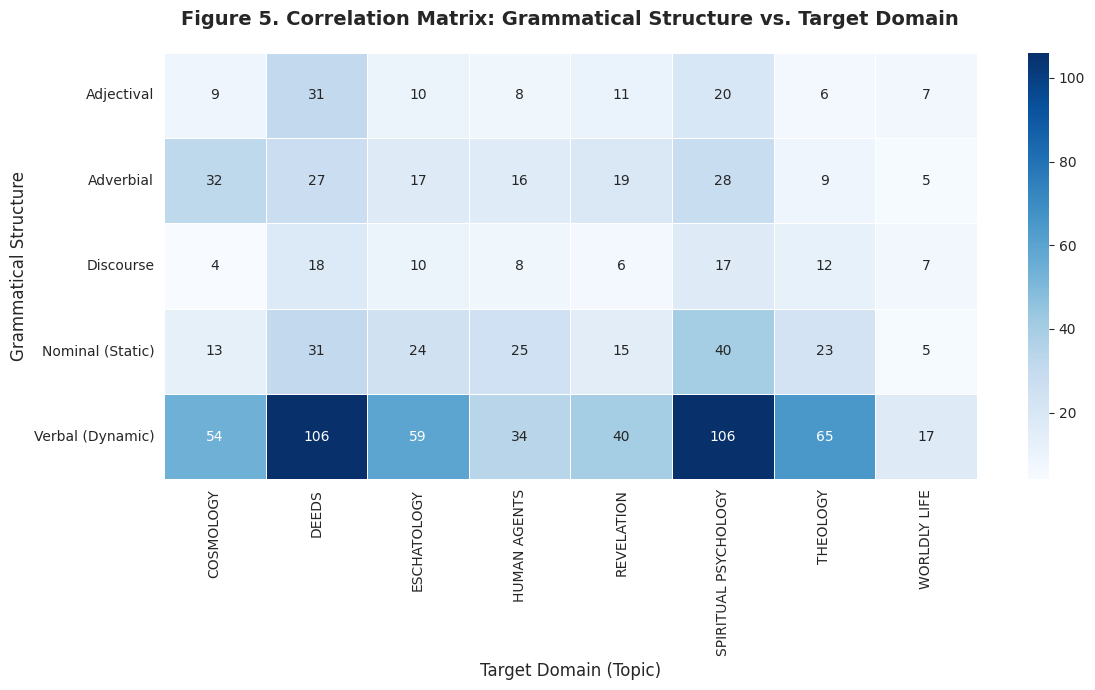

In [ ]:
# @title 6. تحليل العلاقات الارتباطية (Correlation Analysis: Heatmaps)
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# ---------------------------------------------------------
# 1. MOUNT & LOAD
# ---------------------------------------------------------
print("Mounting Google Drive...")
drive.mount('/content/drive')

path_similes = '/content/drive/MyDrive/ Pragmatic/corpus/similes_data.json'
path_metaphors = '/content/drive/MyDrive/Pragmatic/corpus/metaphors_data.json'

# ---------------------------------------------------------
# 2. TAXONOMY MAPPINGS (توحيد التصنيفات لتقليل التشتت)
# ---------------------------------------------------------

# A. Source Domain Map (Sub -> Main)
source_map = {
    'NATURE_ELEMENTS': 'NATURE', 'NATURE_METEO_HYDRO': 'NATURE', 'NATURE_FLORA': 'NATURE', 'NATURE_FAUNA': 'NATURE',
    'LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'FIRE_AND_HEAT': 'SENSORY PHENOMENA', 'SOUND_AND_VOICE': 'SENSORY PHENOMENA',
    'SENSORY_PHENOMENA_LIGHT_AND_DARKNESS': 'SENSORY PHENOMENA', 'SENSORY_PHENOMENA_FIRE_AND_HEAT': 'SENSORY PHENOMENA',
    'COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES', 'WAR_AND_CONFLICT': 'HUMAN ACTIVITIES', 'TRAVEL_AND_PATH': 'HUMAN ACTIVITIES',
    'AGRICULTURE_LABOR': 'HUMAN ACTIVITIES', 'HUMAN_ACTIVITIES_COMMERCE_AND_EXCHANGE': 'HUMAN ACTIVITIES',
    'BUILDINGS_AND_SHELTER': 'HUMAN CONSTRUCTS', 'CLOTHING_AND_ADORNMENT': 'HUMAN CONSTRUCTS', 'TOOLS_AND_ARTIFACTS': 'HUMAN CONSTRUCTS',
    'BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION', 'FAMILY_AND_SOCIETY': 'HUMAN CONDITION', 'PSYCHOLOGY_AND_EMOTION': 'HUMAN CONDITION',
    'HUMAN_CONDITION_BODY_AND_PHYSIOLOGY': 'HUMAN CONDITION',
    'ABSTRACT_SYSTEMS': 'ABSTRACT SYSTEMS', 'DIVINE_LAWS': 'ABSTRACT SYSTEMS', 'HISTORY_AND_TRADITION': 'ABSTRACT SYSTEMS'
}

# B. Target Domain Map
target_map = {
    'THEOLOGY': 'THEOLOGY', 'REVELATION_AND_GUIDANCE': 'REVELATION',
    'ESCHATOLOGY': 'ESCHATOLOGY', 'SPIRITUAL_PSYCHOLOGY': 'SPIRITUAL PSYCHOLOGY',
    'HUMAN_AGENTS_AND_GROUPS': 'HUMAN AGENTS', 'DEEDS_AND_BEHAVIOR': 'DEEDS',
    'WORLDLY_LIFE': 'WORLDLY LIFE', 'COSMOLOGY_AND_NATURE': 'COSMOLOGY'
}

# C. Pragmatic Function Map (Clean labels)
function_map = {
    'Clarification & Imagery': 'Clarification',
    'Argumentation & Persuasion': 'Persuasion',
    'Affirmation & Establishment': 'Affirmation',
    'Warning & Intimidation': 'Warning',
    'Condemnation & Criticism': 'Condemnation',
    'Incentive & Attraction': 'Incentive',
    'Glorification & Exaltation': 'Glorification',
    'Consolation & Reassurance': 'Consolation'
}

# D. Grammatical Structure Map
grammar_map = {
    'nominal_structure': 'Nominal (Static)',
    'verbal_structure': 'Verbal (Dynamic)',
    'adverbial_structure': 'Adverbial',
    'adjectival_structure': 'Adjectival',
    'discourse_structure': 'Discourse'
}

# ---------------------------------------------------------
# 3. DATA EXTRACTION
# ---------------------------------------------------------
def extract_correlations(file_path):
    rows = []
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            records = json.load(f)

        for rec in records:
            items = rec.get('rhetorical_analysis', {}).get('similes', [])
            for item in items:
                # 1. Extract raw values
                comps = item.get('components', {})
                syn = item.get('syntactic_structure', {})
                funcs = item.get('functions', [])

                raw_source = comps.get('source_domain')
                raw_target = comps.get('target_domain')
                raw_grammar = syn.get('grammatical_structure')

                # Get Primary Function (Taking the first tagged function found)
                raw_func = None
                for func in funcs:
                    if func.get('pragmatic_function_tage'):
                        raw_func = func.get('pragmatic_function_tage')
                        break

                # 2. Map values
                clean_source = source_map.get(raw_source)
                clean_target = target_map.get(raw_target)
                clean_grammar = grammar_map.get(raw_grammar)
                clean_func = function_map.get(raw_func)

                # 3. Add to dataset if valid pairs exist
                if clean_source and clean_func:
                    rows.append({'Type': 'Source_vs_Function', 'X': clean_func, 'Y': clean_source})

                if clean_grammar and clean_target:
                    rows.append({'Type': 'Grammar_vs_Target', 'X': clean_target, 'Y': clean_grammar})

    except Exception:
        pass
    return rows

# تحميل البيانات
data = extract_correlations(path_similes) + extract_correlations(path_metaphors)
df = pd.DataFrame(data)

# ---------------------------------------------------------
# 4. VISUALIZATION & NARRATIVE
# ---------------------------------------------------------
if not df.empty:
    print("\n" + "="*60)
    print("📊 RESULTS: FORM-FUNCTION CORRELATIONS")
    print("="*60)

    # --- Plot 1: Source Domain vs. Pragmatic Function ---
    df_sf = df[df['Type'] == 'Source_vs_Function']
    if not df_sf.empty:
        cross_sf = pd.crosstab(df_sf['Y'], df_sf['X'])

        # Find strongest correlation
        max_val = cross_sf.max().max()
        row_max, col_max = cross_sf.stack().idxmax()

        print(f"\n📝 [Generated Narrative 1]:")
        print(f"The cross-tabulation reveals a significant correlation (n={max_val}) between the source domain **'{row_max}'** and the pragmatic function of **'{col_max}'**.")
        print("This suggests that when the Qur'an employs this specific imagery, the communicative intention is predominantly geared towards this function.")

        plt.figure(figsize=(12, 7))
        sns.heatmap(cross_sf, annot=True, fmt='d', cmap='Reds', linewidths=.5)
        plt.title('Figure 4. Correlation Matrix: Source Domains vs. Pragmatic Functions', fontsize=14, weight='bold', pad=20)
        plt.ylabel('Source Domain (Vehicle)', fontsize=12)
        plt.xlabel('Pragmatic Function', fontsize=12)
        plt.tight_layout()
        plt.show()

    # --- Plot 2: Grammatical Structure vs. Target Domain ---
    df_gt = df[df['Type'] == 'Grammar_vs_Target']
    if not df_gt.empty:
        cross_gt = pd.crosstab(df_gt['Y'], df_gt['X'])

        # Find strongest correlation
        max_val_gt = cross_gt.max().max()
        row_max_gt, col_max_gt = cross_gt.stack().idxmax()

        print(f"\n\n📝 [Generated Narrative 2]:")
        print(f"Syntactic analysis indicates a strong correlation (n={max_val_gt}) between **'{row_max_gt}'** and the target domain of **'{col_max_gt}'**.")
        if 'Nominal' in row_max_gt:
            print("This aligns with the hypothesis that Nominal structures are used to encode static truths regarding this domain.")
        elif 'Verbal' in row_max_gt:
            print("This aligns with the hypothesis that Verbal structures are used to encode dynamic processes regarding this domain.")

        plt.figure(figsize=(12, 7))
        sns.heatmap(cross_gt, annot=True, fmt='d', cmap='Blues', linewidths=.5)
        plt.title('Figure 5. Correlation Matrix: Grammatical Structure vs. Target Domain', fontsize=14, weight='bold', pad=20)
        plt.ylabel('Grammatical Structure', fontsize=12)
        plt.xlabel('Target Domain (Topic)', fontsize=12)
        plt.tight_layout()
        plt.show()

else:
    print("⚠️ No valid correlation data found. Check field names matches.")